# Practical 9

### - Name: Manthan Nagpurkar
### - Enrollment No: 190130107071
### - Subject: Machine Learning
### - Aim: Minimal example using Deep learning.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
df = pd.read_csv('breast-cancer.csv')

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

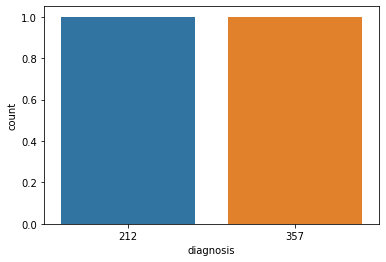

In [12]:
sns.countplot(df['diagnosis'].value_counts())

In [13]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
df = df.drop('id', axis=1)

In [15]:
X = df.drop('diagnosis', axis=1)
y = df.diagnosis

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [18]:
len(X_train), len(X_test), len(y_train), len(y_test)

(455, 114, 455, 114)

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [27]:
model = Sequential()
model.add(Dense(units=9, kernel_initializer='he_uniform', activation='relu', input_dim=30))
model.add(Dense(units=9, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9)                 279       
                                                                 
 dense_4 (Dense)             (None, 9)                 90        
                                                                 
 dense_5 (Dense)             (None, 1)                 10        
                                                                 
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


#### ANN

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
model1 = model.fit(X_train, y_train, batch_size=100, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 1.0204 - accuracy: 0.4659
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.9469 - accuracy: 0.5297
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8850 - accuracy: 0.5736
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8263 - accuracy: 0.6110
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.7711 - accuracy: 0.6308
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.7195 - accuracy: 0.6396
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.6462
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6327 - accuracy: 0.6505
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5945 - accuracy: 0.6659
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5605 - accuracy: 0.6813
Epoch 11/100
5/5 [===========

In [31]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [32]:
y_pred = (y_pred>0.5)
print(y_pred)

[[False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)

Confusion Matrix: 
 [[72  2]
 [ 2 38]]


In [36]:
print('Accuracy Score: \n', accuracy_score(y_test, y_pred))

Accuracy Score: 
 0.9649122807017544


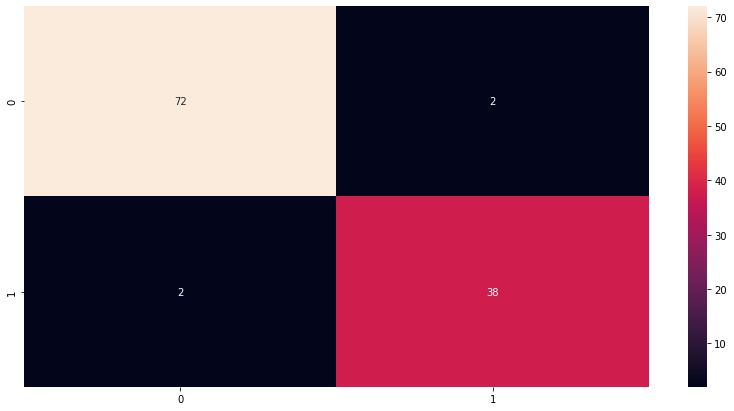

In [37]:
plt.figure(figsize=(14, 7))
sns.heatmap(cm, annot=True)
plt.show()

In [39]:
model1.history.keys()

dict_keys(['loss', 'accuracy'])

#### Model Accuracy graph

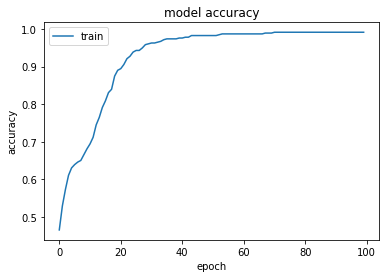

In [41]:
plt.plot(model1.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

#### Model Loss graph

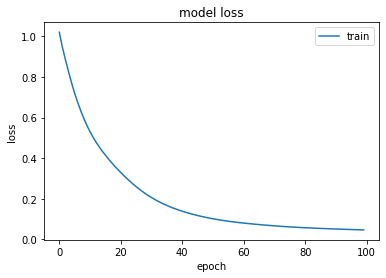

In [42]:
plt.plot(model1.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()

In [44]:
model.save('ann-model-on-cancer-data.h5')